# RANDOM STOCK MARKET PROJECT 

This notebook loads `random_stock_market_dataset.csv` (place it in the same folder), performs cleaning, feature engineering, descriptive statistics, answers common stock questions (mean, median, mode, volatility), and shows beginner-friendly visualizations. Explanations follow each visualization.

## 0) Setup — imports and settings

In [1]:
# 0) Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

FILE = "random_stock_market_dataset.csv"
TARGET = "Close"
CATEGORICAL = "Sector"

print('Setup complete. Make sure your CSV is named:', FILE)

Setup complete. Make sure your CSV is named: random_stock_market_dataset.csv


## 1) Load the data

In [2]:
# 1) Load data
df = pd.read_csv(FILE)
print("Data shape:", df.shape)
display(df.head())
display(df.info())

Data shape: (60, 6)


,Date,Open,High,Low,Close,Volume
0,2024-01-01,296.45,307.31,293.96,303.72,93133
1,2024-01-02,190.11,193.10,187.21,191.40,64993
2,2024-01-03,197.41,208.64,193.37,205.89,70326
3,2024-01-04,253.13,262.67,248.67,258.95,17358
4,2024-01-05,241.35,253.09,238.99,252.20,20847


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60 non-null     object 
 1   Open    60 non-null     float64
 2   High    60 non-null     float64
 3   Low     60 non-null     float64
 4   Close   60 non-null     float64
 5   Volume  60 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


None

## 2) Basic cleaning

In [3]:
# 2) Basic cleaning
df.columns = [c.strip() for c in df.columns]
for c in df.columns:
    if 'date' in c.lower() or 'time' in c.lower():
        df[c] = pd.to_datetime(df[c], errors='coerce')
        print(f"Parsed datetime for: {c} (non-null: {df[c].notnull().sum()})")
display(df.head())

Parsed datetime for: Date (non-null: 60)


,Date,Open,High,Low,Close,Volume
0,2024-01-01,296.45,307.31,293.96,303.72,93133
1,2024-01-02,190.11,193.10,187.21,191.40,64993
2,2024-01-03,197.41,208.64,193.37,205.89,70326
3,2024-01-04,253.13,262.67,248.67,258.95,17358
4,2024-01-05,241.35,253.09,238.99,252.20,20847


## 3) Missing values & duplicates

In [4]:
# 3) Missing values & duplicates
print("Missing values per column:")
print(df.isnull().sum())

dups = df.duplicated().sum()
print("\nDuplicate rows:", dups)
if dups > 0:
    df = df.drop_duplicates()
    print("Dropped duplicate rows.")

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print("\nMissing after numeric imputation:")
print(df.isnull().sum())

Missing values per column:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Duplicate rows: 0

Missing after numeric imputation:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


## 4) Feature engineering

In [16]:
# 4) Feature engineering
if 'Open' in df.columns and 'Close' in df.columns:
    df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open'] * 100
    print("Added Daily_Return")

if 'High' in df.columns and 'Low' in df.columns:
    df['Price_Range'] = df['High'] - df['Low']
    print("Added Price_Range")

if 'Close' in df.columns:
    df['MA_7_Close'] = df['Close'].rolling(window=7, min_periods=1).mean()
    print("Added MA_7_Close")

display(df.head())

Added Daily_Return
Added Price_Range
Added MA_7_Close


,Date,Open,High,Low,Close,Volume,Daily_Return,Price_Range,MA_7_Close
0,2024-01-01,296.45,307.31,293.96,303.72,93133,2.452353,13.35,303.720
1,2024-01-02,190.11,193.10,187.21,191.40,64993,0.678555,5.89,247.560
2,2024-01-03,197.41,208.64,193.37,205.89,70326,4.295628,15.27,233.670
3,2024-01-04,253.13,262.67,248.67,258.95,17358,2.299214,14.00,239.990
4,2024-01-05,241.35,253.09,238.99,252.20,20847,4.495546,14.10,242.432


## 5) Descriptive statistics

In [6]:
# 5) Descriptive statistics
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
stats_df = pd.DataFrame(index=num_cols, columns=['mean','median','mode','std','min','max','count'])
for c in num_cols:
    stats_df.loc[c, 'mean'] = df[c].mean()
    stats_df.loc[c, 'median'] = df[c].median()
    modes = df[c].mode()
    stats_df.loc[c, 'mode'] = modes.iloc[0] if not modes.empty else np.nan
    stats_df.loc[c, 'std'] = df[c].std()
    stats_df.loc[c, 'min'] = df[c].min()
    stats_df.loc[c, 'max'] = df[c].max()
    stats_df.loc[c, 'count'] = df[c].count()
display(stats_df)

,mean,median,mode,std,min,max,count
Open,310.552,303.24,112.68,108.859051,112.68,492.79,60
High,322.589833,313.8,123.78,109.095813,123.78,501.67,60
Low,308.056833,302.385,109.43,108.986426,109.43,492.3,60
Close,320.412667,309.385,121.27,109.157159,121.27,500.42,60
Volume,95405.516667,93850.5,13193,54895.342146,13193,195189,60
Daily_Return,3.662087,2.951336,0.678555,2.38594,0.678555,14.129292,60
Price_Range,14.533,13.9,13.35,4.712903,5.89,26.46,60
MA_7_Close,321.269914,326.611429,233.67,41.440386,233.67,401.41,60


## 6) Questions & automated answers

In [ ]:
# 6) Questions & answers
# Average daily return
if 'Daily_Return' in df.columns:
    print("Average Daily Return (mean):", df['Daily_Return'].mean())
else:
    print("Daily_Return not available")

# Day with maximum Price_Range
if 'Price_Range' in df.columns:
    idx = df['Price_Range'].idxmax()
    date_cols = [c for c in df.columns if pd.api.types.is_datetime64_any_dtype(df[c])]
    date_val = df.loc[idx, date_cols[0]] if date_cols else 'N/A'
    print("Max price range row index:", idx, "date:", date_val, "range:", df.loc[idx,'Price_Range'])
else:
    print("Price_Range not available")

# Mean close by sector
if 'Sector' in df.columns and 'Close' in df.columns:
    display(df.groupby('Sector')['Close'].mean().sort_values(ascending=False))
else:
    print("Sector or Close missing for mean by sector")

# Correlation of Open, Close, Volume
cols = [c for c in ['Open','Close','Volume'] if c in df.columns]
if len(cols) >= 2:
    display(df[cols].corr())
else:
    print("Not enough columns for Open/Close/Volume correlation")

Average Daily Return (mean): 3.662087453475019
Max price range row index: 8 date: 2024-01-09 00:00:00 range: 26.460000000000036
Sector or Close missing for mean by sector


,Open,Close,Volume
Open,1.000000,0.999174,-0.133607
Close,0.999174,1.000000,-0.138425
Volume,-0.133607,-0.138425,1.000000


## 7) Visualizations with short explanations

In [8]:
# 7.1 Pie chart (Sector) and explanation
if 'Sector' in df.columns:
    counts = df['Sector'].value_counts()
    plt.figure(figsize=(6,6))
    counts.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.ylabel('')
    plt.title('Distribution by Sector')
    plt.show()
    print("Explanation: Shows how many rows belong to each sector; helpful for understanding class balance.")
else:
    print("Sector column not found — skipping pie chart.")

Sector column not found — skipping pie chart.


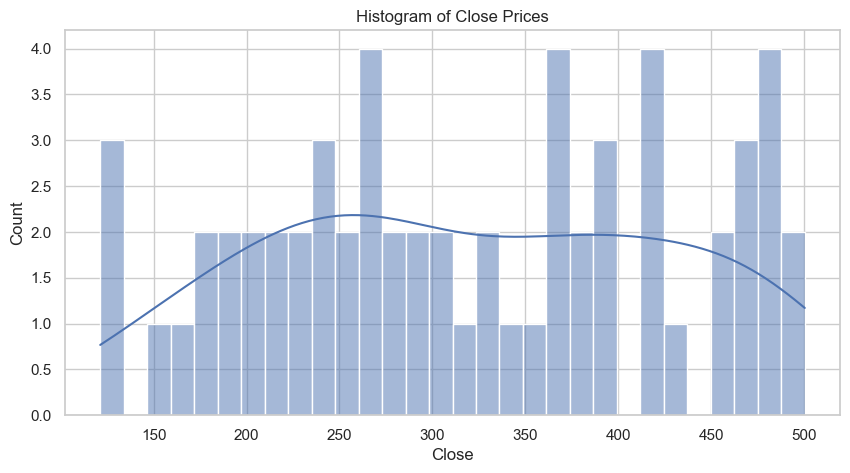

Explanation: Shows distribution and skew of closing prices; useful to see if data is heavy-tailed or normal-like.


In [9]:
# 7.2 Histogram of Close with explanation
if 'Close' in df.columns:
    plt.figure()
    sns.histplot(df['Close'], kde=True, bins=30)
    plt.title('Histogram of Close Prices')
    plt.show()
    print("Explanation: Shows distribution and skew of closing prices; useful to see if data is heavy-tailed or normal-like.")
else:
    print("Close not found — skipping histogram.")

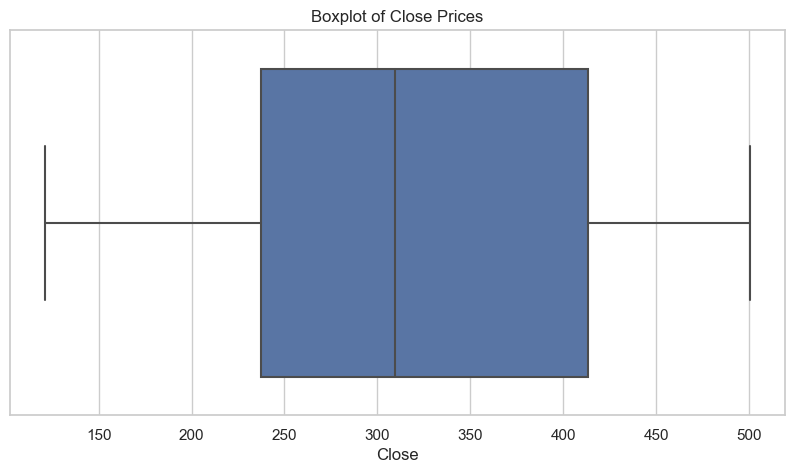

Explanation: Highlights outliers and spread; points outside whiskers are potential outliers.


In [10]:
# 7.3 Boxplot of Close and explanation
if 'Close' in df.columns:
    plt.figure()
    sns.boxplot(x=df['Close'])
    plt.title('Boxplot of Close Prices')
    plt.show()
    print("Explanation: Highlights outliers and spread; points outside whiskers are potential outliers.")
else:
    print("Close not found — skipping boxplot.")

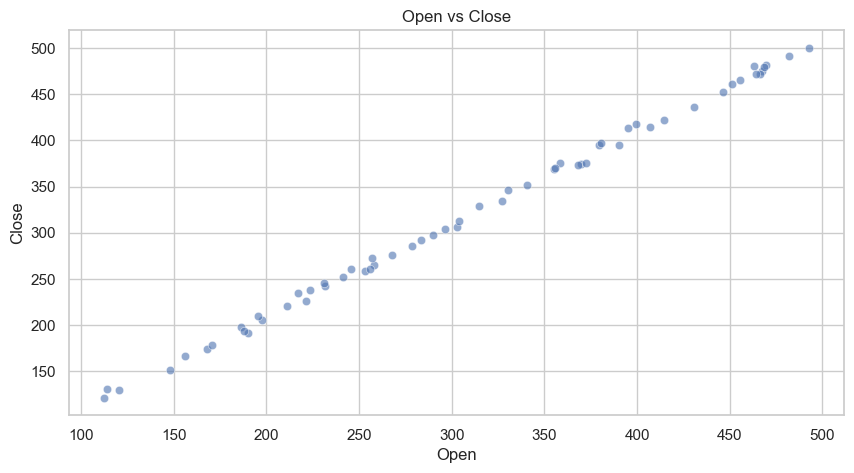

Explanation: If points lie close to a diagonal line, Open and Close move together (high correlation).


In [11]:
# 7.4 Scatter: Open vs Close and explanation
if 'Open' in df.columns and 'Close' in df.columns:
    plt.figure()
    sns.scatterplot(x=df['Open'], y=df['Close'], alpha=0.6)
    plt.title('Open vs Close')
    plt.show()
    print("Explanation: If points lie close to a diagonal line, Open and Close move together (high correlation).")
else:
    print("Open or Close missing — skipping scatter.")

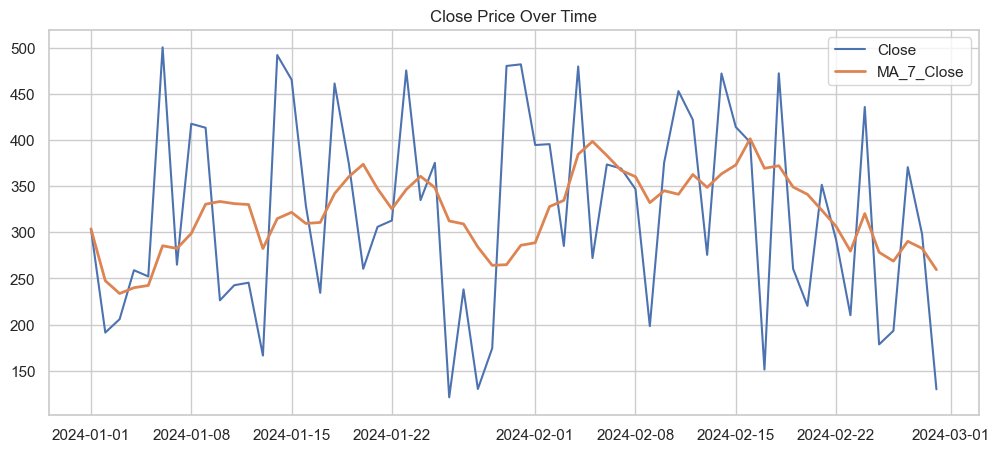

Explanation: Moving average smooths noise and reveals trends.


In [12]:
# 7.5 Time-series: Close and 7-day MA and explanation
date_cols = [c for c in df.columns if pd.api.types.is_datetime64_any_dtype(df[c])]
if date_cols and 'Close' in df.columns:
    d = date_cols[0]
    df_sorted = df.sort_values(d)
    plt.figure(figsize=(12,5))
    plt.plot(df_sorted[d], df_sorted['Close'], label='Close')
    if 'MA_7_Close' in df_sorted.columns:
        plt.plot(df_sorted[d], df_sorted['MA_7_Close'], label='MA_7_Close', linewidth=2)
    plt.legend(); plt.title('Close Price Over Time')
    plt.show()
    print("Explanation: Moving average smooths noise and reveals trends.")
else:
    print("No datetime column or Close missing — skipping time-series.")

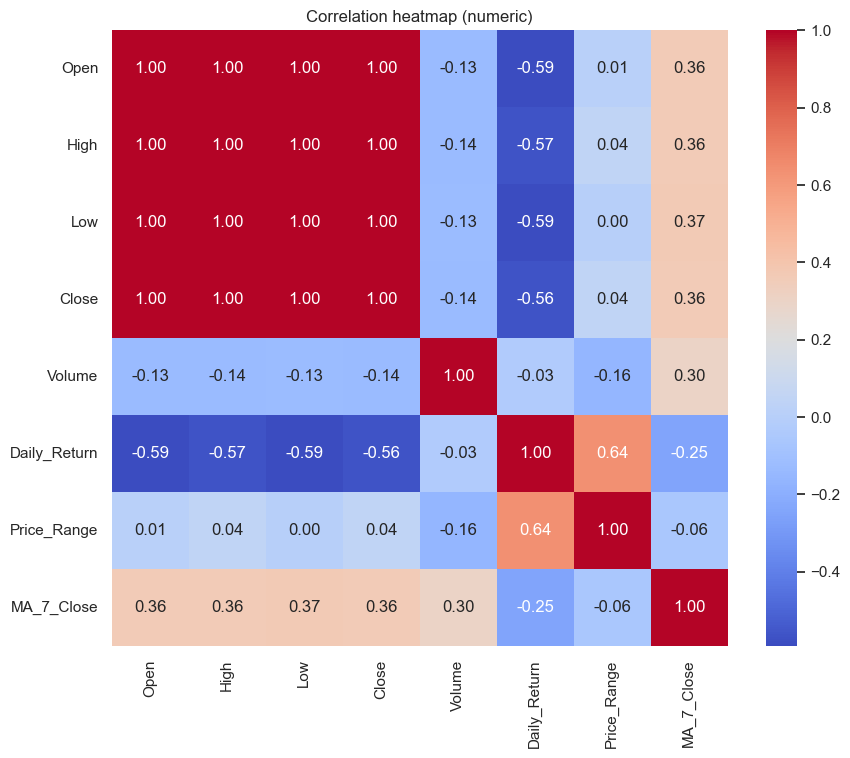

Explanation: Use this to spot strong positive/negative correlations, which can affect modeling.


In [13]:
# 7.6 Correlation heatmap and explanation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation heatmap (numeric)')
    plt.show()
    print("Explanation: Use this to spot strong positive/negative correlations, which can affect modeling.")
else:
    print("Not enough numeric columns for heatmap.")

## 8) Multicollinearity check (VIF) — explained
This section calculates Variance Inflation Factor (VIF) for numeric features. VIF > 5 suggests high correlation; VIF > 10 is severe.

In [14]:
# 8) VIF calculation
num_for_vif = df.select_dtypes(include=[np.number]).dropna().copy()
if TARGET in num_for_vif.columns:
    num_for_vif = num_for_vif.drop(columns=[TARGET])
if num_for_vif.shape[1] == 0:
    print("No numeric features for VIF.")
else:
    X = sm.add_constant(num_for_vif)
    vif_df = pd.DataFrame({'feature': X.columns, 'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})
    display(vif_df.sort_values('VIF', ascending=False))
    print("Explanation: High VIF means feature is linearly predictable from others; consider dropping or combining features.")

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
2,High,inf
3,Low,inf
6,Price_Range,inf
1,Open,8510.423458
0,const,95.367479
5,Daily_Return,4.524436
7,MA_7_Close,1.375926
4,Volume,1.271545


Explanation: High VIF means feature is linearly predictable from others; consider dropping or combining features.


## 9) Conclusion & next steps
Write your observations here after running the notebook. Suggestions:
- Investigate and decide what to do with high-VIF features.
- Use log transformation if prices are heavily skewed.
- For predictive models, consider returns instead of raw prices.

In [15]:
# 9) Conclusion template
print("After running this notebook, summarize your key findings here.")

After running this notebook, summarize your key findings here.
